1. Data Exploration:
* Load the dataset and perform exploratory data analysis (EDA).
* Examine the features, their types, and summary statistics.
* Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
* Analyze any patterns or correlations observed in the data.

In [2]:
#load the dataset
import pandas as pd
train_data=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\Logistic Regression\Titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# gives information about null values and data type of each and every column of training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.dtypes  #data type of each column of training data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#print duplicated rows in training data
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


it means, there is no duplicated row in training data

In [9]:
# gives descriptive statistics of numerical columns of training data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#train_data.corr(numeric_only=True)

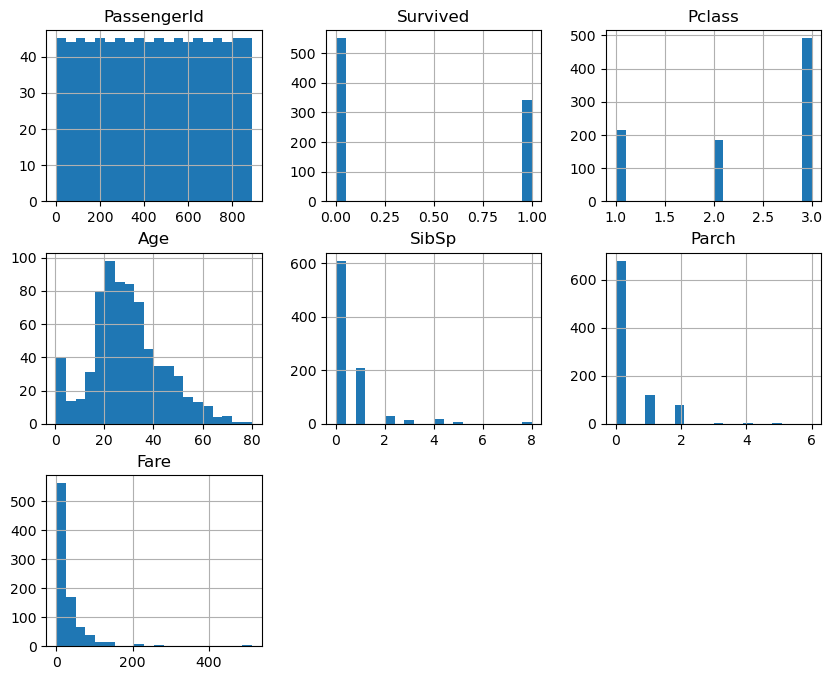

In [11]:

# Visualizing the distributions using histograms for the key numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
train_data.hist(figsize=(10,8),bins=20)
plt.show()




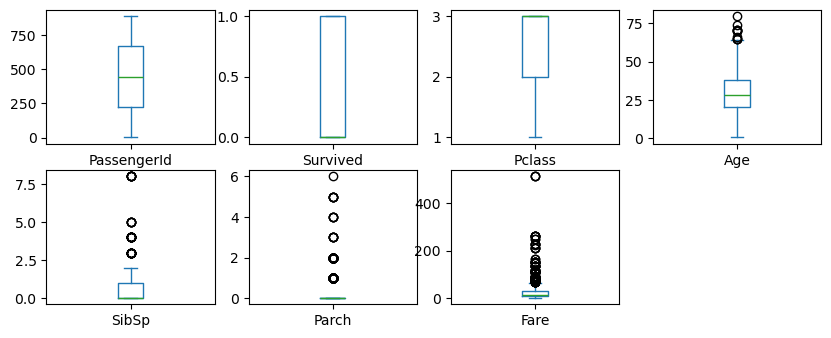

In [12]:
train_data.plot(kind='box',figsize=(10,8),subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

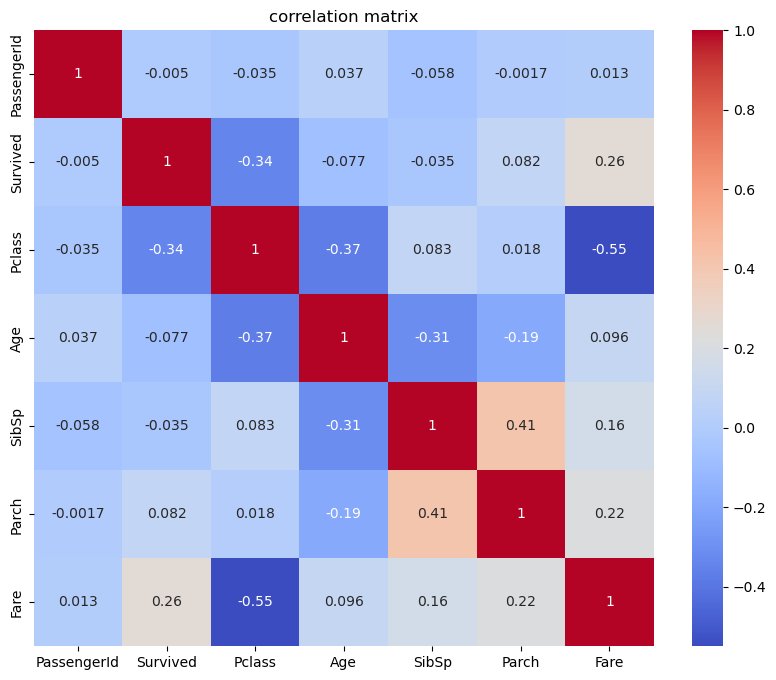

In [13]:
df_numeric=train_data.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

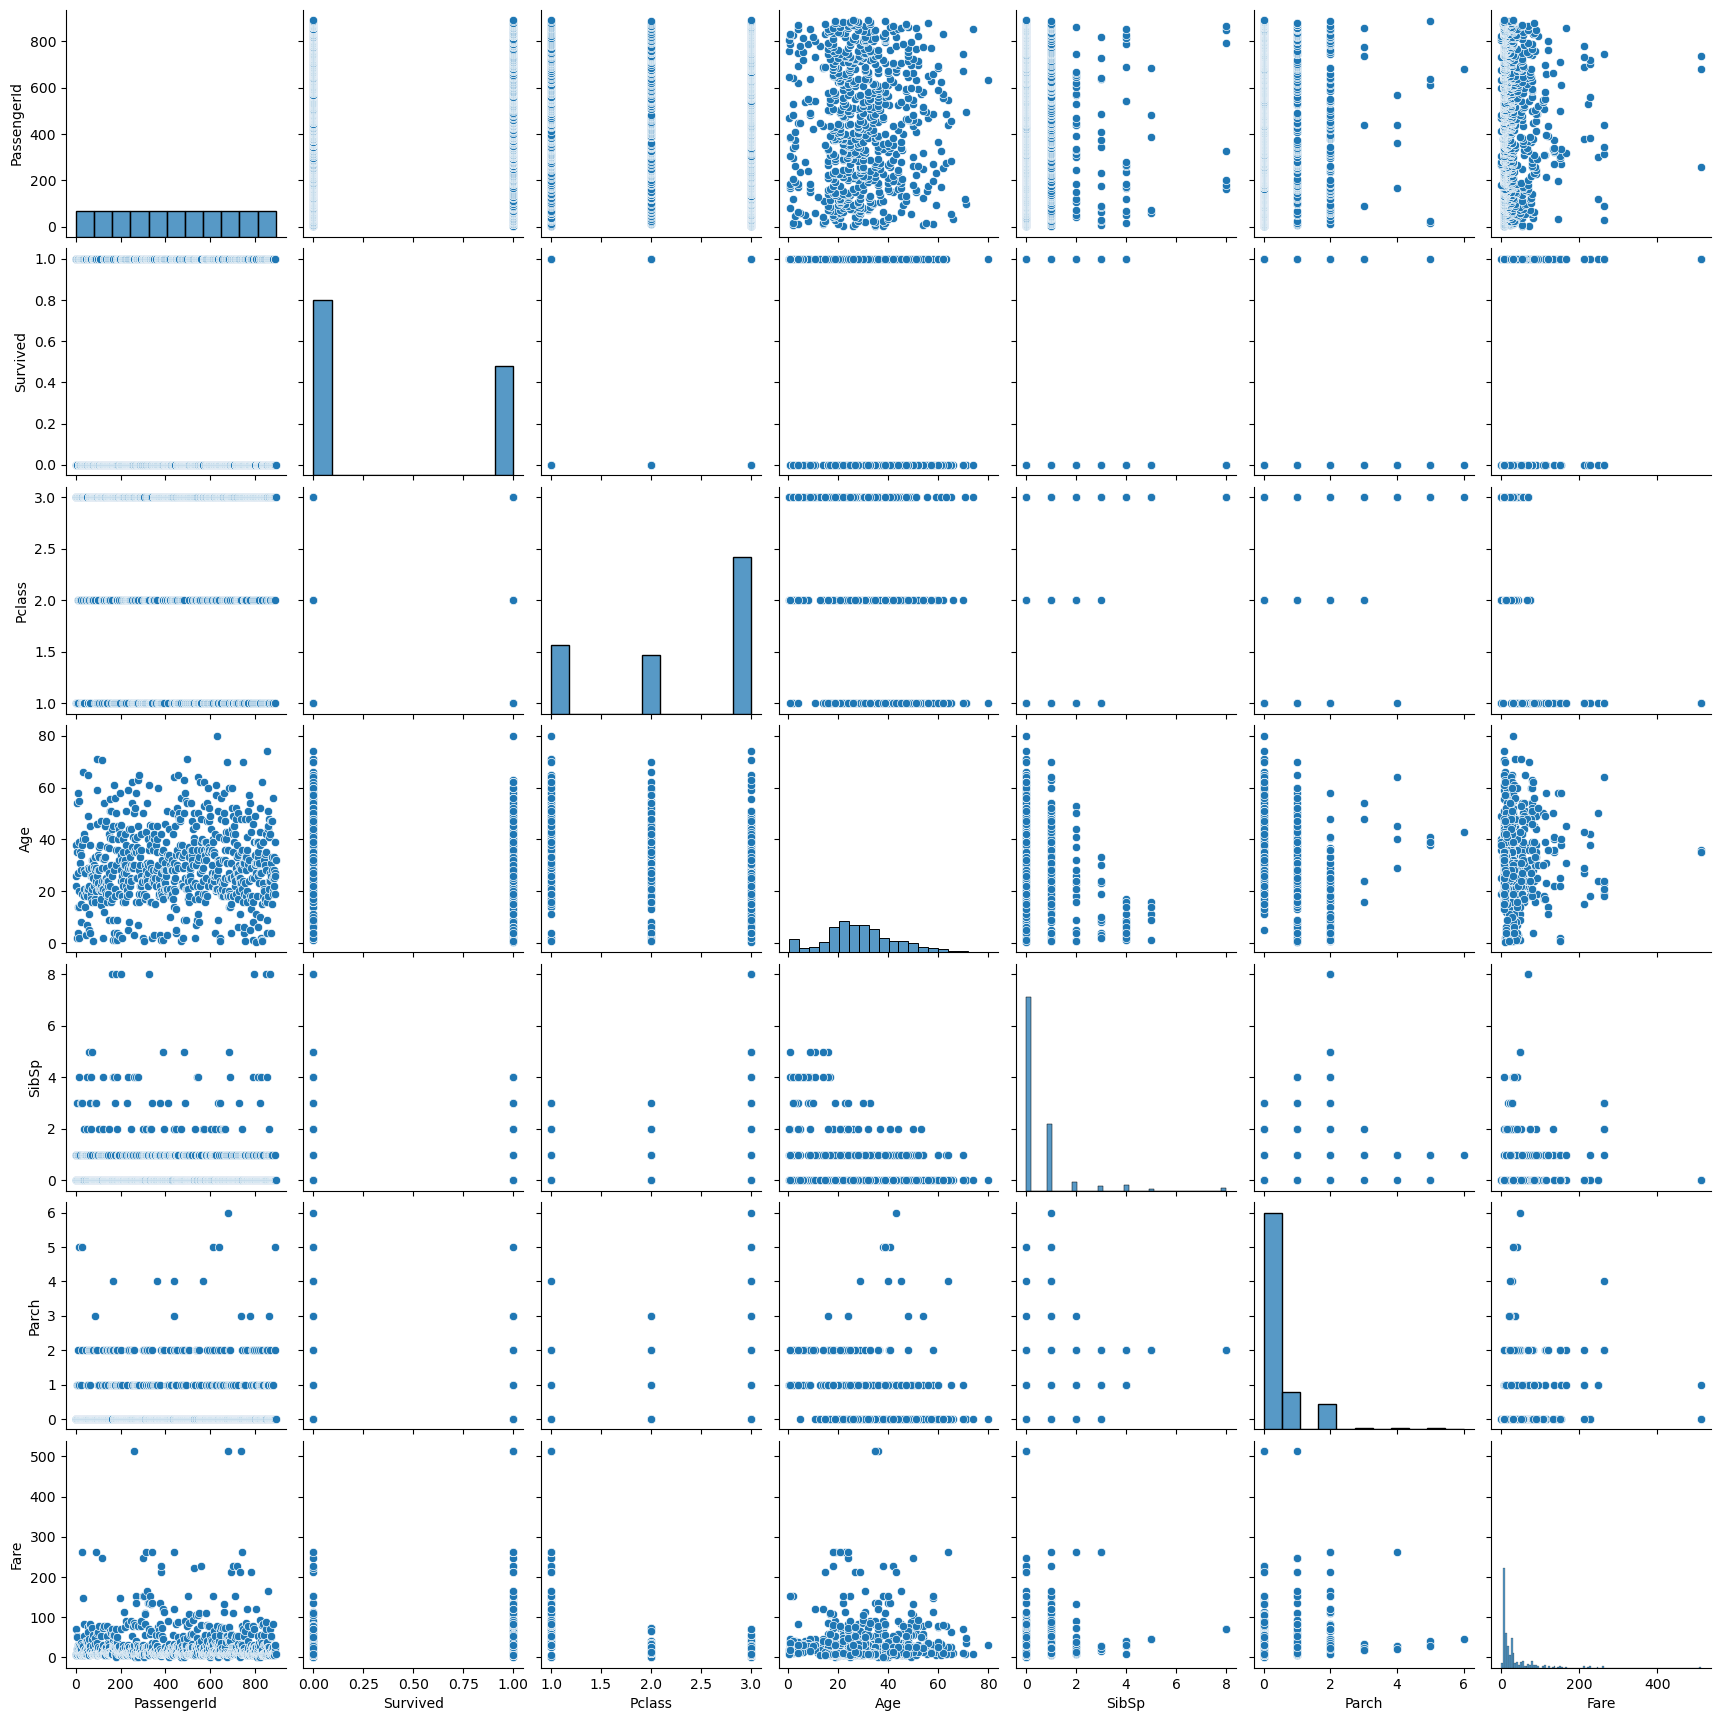

In [14]:
# Pairplot to see relationships between features
sns.pairplot(df_numeric)
plt.show()

2. Data Preprocessing:

a. Handle missing values (e.g., imputation).
b. Encode categorical variables.


In [16]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Impute numerical columns with the median
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


In [39]:
train_data.drop(columns=['Cabin'], inplace=True)

In [41]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
#  Select numerical columns
numerical_features = train_data.select_dtypes(include=['float', 'int']).columns

#  Check for columns with all missing values and drop them before imputation
numerical_features_with_data = train_data[numerical_features].columns[train_data[numerical_features].notna().any()]

In [53]:
# Impute only the selected numerical columns
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')
train_data[numerical_features_with_data] = imputer_num.fit_transform(train_data[numerical_features_with_data])

# Check if the data imputation was successful
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(7), object(4)
memory usage: 76.7+ KB
None


In [63]:
from sklearn.preprocessing import LabelEncoder 
categorical_features = train_data.select_dtypes(include=['object']).columns
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Display the first few rows of the processed dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,0.0,3.0,108,1,22.0,1.0,0.0,523,7.2500,2
1,2.0,1.0,1.0,190,0,38.0,1.0,0.0,596,71.2833,0
2,3.0,1.0,3.0,353,0,26.0,0.0,0.0,669,7.9250,2
3,4.0,1.0,1.0,272,0,35.0,1.0,0.0,49,53.1000,2
4,5.0,0.0,3.0,15,1,35.0,0.0,0.0,472,8.0500,2


In [65]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Model Building
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).


b. Train the model using the training data.


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# Define features (X) and target (y) - assuming 'Survived' is the target column
X = train_data.drop(columns=['Survived'])  # Drop the target column
y = train_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [84]:
# Build and train the logistic regression model
model = LogisticRegression(solver='liblinear',max_iter=200)  # Increase iterations if needed
model.fit(X_train, y_train)


LogisticRegression(max_iter=200, solver='liblinear')

In [78]:
# Predict using the test set
y_pred = model.predict(X_test)

In [101]:
import statsmodels.api as sm
# Predict using the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.486358
         Iterations 6


#### 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.


In [87]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [89]:
# Printing all the evaluation metrics
print('Accuracy:', round(accuracy, 2))
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))
print('F1 Score:', round(f1, 2))
print('ROC-AUC Score:', round(roc_auc, 2))

Accuracy: 0.78
Precision: 0.75
Recall: 0.69
F1 Score: 0.72
ROC-AUC Score: 0.84


In [91]:
# Confusion Matrix and Classification Report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[88 17]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       105
         1.0       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



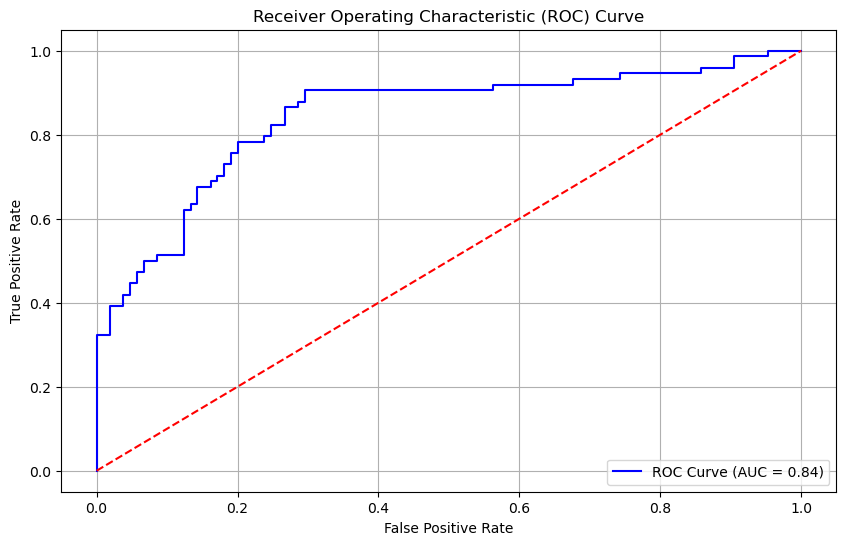

In [99]:
# Visualize the ROC curve
roc_auc = auc(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [103]:
# Interpretation of Coefficients
coefficients = result.params
print("\nCoefficients Interpretation:")

for feature, coef in coefficients.items():
    print(f"The coefficient for {feature} is {coef:.4f}. This implies that for a one-unit increase in {feature}, "
          f"the log-odds of survival changes by {coef:.4f} units.")



Coefficients Interpretation:
The coefficient for PassengerId is 0.0012. This implies that for a one-unit increase in PassengerId, the log-odds of survival changes by 0.0012 units.
The coefficient for Pclass is -0.0185. This implies that for a one-unit increase in Pclass, the log-odds of survival changes by -0.0185 units.
The coefficient for Name is 0.0002. This implies that for a one-unit increase in Name, the log-odds of survival changes by 0.0002 units.
The coefficient for Sex is -2.4213. This implies that for a one-unit increase in Sex, the log-odds of survival changes by -2.4213 units.
The coefficient for Age is 0.0023. This implies that for a one-unit increase in Age, the log-odds of survival changes by 0.0023 units.
The coefficient for SibSp is -0.2638. This implies that for a one-unit increase in SibSp, the log-odds of survival changes by -0.2638 units.
The coefficient for Parch is -0.1537. This implies that for a one-unit increase in Parch, the log-odds of survival changes by 

In [105]:
# Discussing Significance of Features
significant_features = result.pvalues[result.pvalues < 0.05].index
print("\nSignificant Features:")
for feature in significant_features:
    print(f"The feature '{feature}' is statistically significant in predicting survival "
          f"(p-value = {result.pvalues[feature]:.4f}).")


Significant Features:
The feature 'PassengerId' is statistically significant in predicting survival (p-value = 0.0015).
The feature 'Sex' is statistically significant in predicting survival (p-value = 0.0000).
The feature 'SibSp' is statistically significant in predicting survival (p-value = 0.0096).
The feature 'Fare' is statistically significant in predicting survival (p-value = 0.0000).
